In [5]:
import tensorflow as tf
from tensorflow.keras import layers , models

In [6]:
def conv_block(x,filters,stride=2):

  f1,f2,f3 = filters
  sortcut = x

  # 1 conv layer
  x = layers.Conv2D(f1,1,strides=stride)(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)

  # 2 conv layer
  x = layers.Conv2D(f2,3,strides=stride,padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)

  # 3 conv layer
  x = layers.Conv2D(f3,1)(x)
  x = layers.BatchNormalization()(x)

  # Adjust shortcut for shape match
  sortcut = layers.Conv2D(f3,1,strides=stride)(sortcut)

  # Add sortcut and activate
  x = layers.Add()([x,sortcut])
  x = layers.ReLU()(x)

  return x

In [7]:
def identity_block(x,filters):

  f1,f2,f3 = filters
  sortcut = x

  # 1 conv layer
  x = layers.Conv2D(f1,1,padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)

  # 2 conv layer
  x = layers.Conv2D(f2,3,padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)

  # 3 conv layer
  x = layers.Conv2D(f3,1)(x)
  x = layers.BatchNormalization()(x)

  # Add sortcut and activate
  x = layers.Add()([x,sortcut])
  x = layers.ReLU()(x)

  return x

In [9]:
def build_resnet50(input_shape=(224,224,3), num_classes=1000):
  input = layers.Input(shape=input_shape)

  # Initial Conv + MaxPool
  x = layers.Conv2D(64,7,strides=2,padding='same')(input)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.MaxPool2D(3,strides=2,padding='same')(x)

  # conv2_x (1 conv block + 2 identity blocks)
  x = conv_block(x,[64,64,256],stride=1)
  x = identity_block(x,[64,64,256])
  x = identity_block(x,[64,64,256])

  # conv3_x (1 conv block + 3 identity blocks)
  x = conv_block(x,[128,128,512],stride=1)
  x = identity_block(x,[128,128,512])
  x = identity_block(x,[128,128,512])
  x = identity_block(x,[128,128,512])

  # conv4_x (1 conv block + 5 identity blocks)
  x = conv_block(x,[256,256,1024],stride=1)
  for _ in range(5):
    x = identity_block(x,[256,256,1024])

  # conv5_x (1 conv block + 2 identity blocks)
  x = conv_block(x,[512,512,2048],stride=1)
  x = identity_block(x,[512,512,2048])
  x = identity_block(x,[512,512,2048])

  # Global Average Pooling
  x = layers.GlobalAveragePooling2D()(x)

  # Output Layer
  output = layers.Dense(num_classes,activation='softmax')(x)

  return models.Model(inputs=input,outputs=output)

# Build model & Summary
resnet50 = build_resnet50()
resnet50.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     16,640 │ re_lu_2[0][0]     │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     16,640 │ max_pooling2d[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 256)              │            │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ add[0][0]         │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 56, 56,    │     16,448 │ re_lu_3[0][0]   

 Total params: 25,621,352 (97.74 MB)

 Trainable params: 25,575,912 (97.56 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [10]:
def build_resnet100(input_shape=(224,224,3), num_classes=1000):
  input = layers.Input(shape=input_shape)

  # Initial Conv + MaxPool
  x = layers.Conv2D(64,7,strides=2,padding='same')(input)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.MaxPool2D(3,strides=2,padding='same')(x)

  # conv2_x (1 conv block + 2 identity blocks)
  x = conv_block(x,[64,64,256],stride=1)
  x = identity_block(x,[64,64,256])
  x = identity_block(x,[64,64,256])

  # conv3_x (1 conv block + 3 identity blocks)
  x = conv_block(x,[128,128,512],stride=1)
  x = identity_block(x,[128,128,512])
  x = identity_block(x,[128,128,512])
  x = identity_block(x,[128,128,512])

  # conv4_x (1 conv block + 22 identity blocks)
  x = conv_block(x,[256,256,1024],stride=1)
  for _ in range(22):
    x = identity_block(x,[256,256,1024])

  # conv5_x (1 conv block + 2 identity blocks)
  x = conv_block(x,[512,512,2048],stride=1)
  x = identity_block(x,[512,512,2048])
  x = identity_block(x,[512,512,2048])

  # Global Average Pooling
  x = layers.GlobalAveragePooling2D()(x)

  # Output Layer
  output = layers.Dense(num_classes,activation='softmax')(x)

  return models.Model(inputs=input,outputs=output)

# Build model & Summary
resnet100 = build_resnet100()
resnet100.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_53[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_49 (ReLU)     │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ re_lu_49[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 56, 56,    │      4,160 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_54[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_50 (ReLU)     │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 56, 56,    │     36,928 │ re_lu_50[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_55[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_51 (ReLU)     │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 56, 56,    │     16,640 │ re_lu_51[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ conv2d_56[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 56, 56,    │     16,640 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_16 (Add)        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 256)              │            │ conv2d_57[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_52 (ReLU)     │ (None, 56, 56,    │          0 │ add_16[0][0]      │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 56, 56,    │     16,448 │ re_lu_52[0][0]  

 Total params: 44,691,816 (170.49 MB)

 Trainable params: 44,594,152 (170.11 MB)

 Non-trainable params: 97,664 (381.50 KB)

In [11]:
import torch
from torchvision import models , transforms
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
# Load pre-train model
model = models.resnet101(pretrained=True)
model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


100%|██████████| 171M/171M [00:01<00:00, 109MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [31]:
img = Image.open('/content/koala cat.jpeg').convert('RGB')
input_tensor = preprocess(img).unsqueeze(0)

In [32]:
# make prediction
with torch.no_grad():
  output = model(input_tensor)
  pred_class = output.argmax(1).item()

In [33]:
# get human readable label
from torchvision.models import ResNet101_Weights
labels = ResNet101_Weights.DEFAULT.meta["categories"]
label = labels[pred_class]

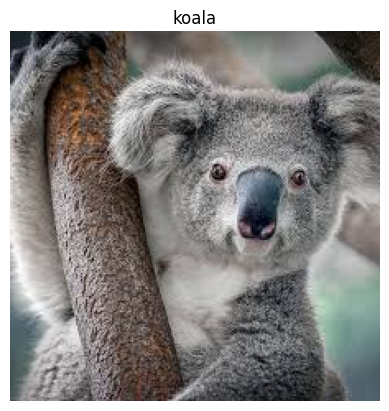

In [34]:
plt.imshow(img)
plt.title(label)
plt.axis('off')
plt.show()